# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

In [ ]:
data.isnull().values.any()

False

In [ ]:
data['Movie_Title'].duplicated().any()

True

In [ ]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace(r'[$,]', '', regex=True)
data.head()

In [ ]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(r'[$,]', '', regex=True)
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace(r'[$,]', '', regex=True)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format="%m/%d/%Y")
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])

### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
ave_prod_budget = data['USD_Production_Budget'].mean()
print(ave_prod_budget)

31113737.57837136


In [ ]:
ave_world_gross = data['USD_Worldwide_Gross'].mean()
print(ave_world_gross)

88855421.96271564


In [ ]:
print(data.min())

Rank                                       1
Release_Date             1915-08-02 00:00:00
Movie_Title                          #Horror
USD_Production_Budget                   1100
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
dtype: object


In [ ]:
data_sort_by_rank = data.sort_values('Rank', ascending=True)
data_sort_by_rank.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1209,5387,1999-02-04,Following,6000,240495,48482
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
print(data[data.USD_Production_Budget == data.USD_Production_Budget.max()])
print(data[data.USD_Worldwide_Gross == data.USD_Worldwide_Gross.max()])

      Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625  
      Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625  


In [ ]:
data['Total_Gross'] = data['USD_Domestic_Gross']+data['USD_Worldwide_Gross']

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,21000000
1,5140,1916-05-09,Intolerance,385907,0,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,33000000


In [ ]:
data_sort_by_budget = data.sort_values('USD_Production_Budget')
data.tail(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,0


In [ ]:
data_sort_by_budget.head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,362082


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data_0_gross_domestic = data[data['USD_Domestic_Gross']==0]

In [ ]:
data_0_gross_domestic.count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
Total_Gross              512
dtype: int64

In [ ]:
data_0_gross_domestic.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
5388,96,2020-12-31,Singularity,175000000,0,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,4547660


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data_0_gross_world = data[data['USD_Worldwide_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)
data_0_gross_world.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
5388,96,2020-12-31,Singularity,175000000,0,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data.query('(USD_Domestic_Gross == 0) and (USD_Worldwide_Gross != 0)')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0,3220
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,7890
1744,3695,2001-12-31,The Hole,7500000,10834406,0,10834406
2155,4236,2003-12-31,Nothing,4000000,63180,0,63180
2203,2513,2004-03-31,The Touch,20000000,5918742,0,5918742
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,1480089
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,58807172
5360,4832,2017-07-03,Departure,1100000,27561,0,27561
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,48048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
future_releases = data.loc[data['Release_Date'] >= scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0,0
5386,2950,2018-10-08,Meg,15000000,0,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0,0
5388,96,2020-12-31,Singularity,175000000,0,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,0


In [ ]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
data_clean[data_clean['USD_Worldwide_Gross'] < data_clean['USD_Production_Budget']].count()/len(data_clean)

Rank                    0.37
Release_Date            0.37
Movie_Title             0.37
USD_Production_Budget   0.37
USD_Worldwide_Gross     0.37
USD_Domestic_Gross      0.37
Total_Gross             0.37
dtype: float64

# Seaborn for Data Viz: Bubble Charts

In [ ]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



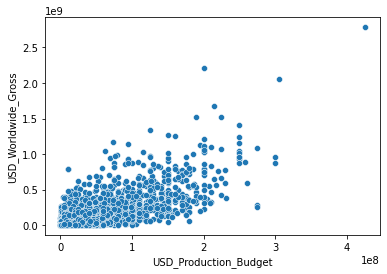

In [ ]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

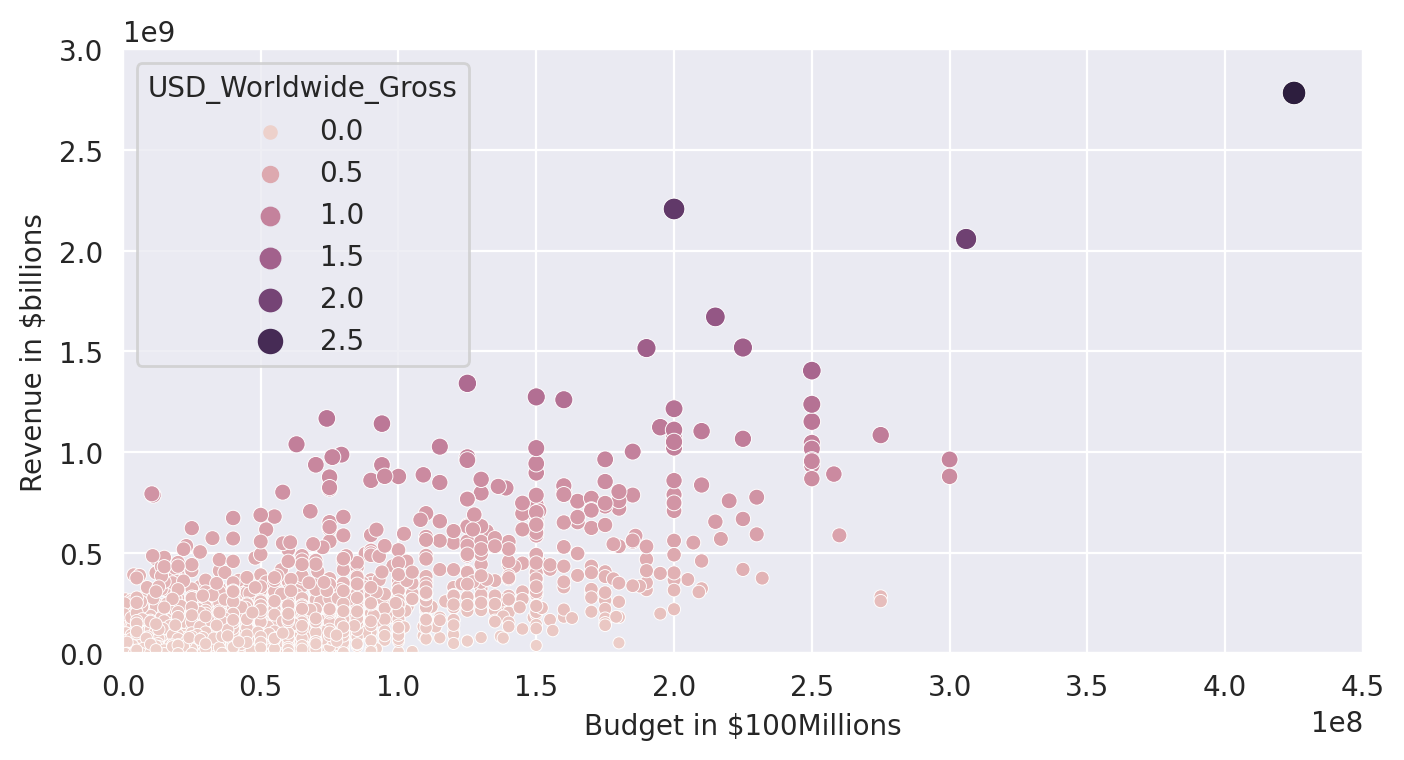

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='USD_Production_Budget',
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross',
                      size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $billions',
        xlabel='Budget in $100Millions')
plt.show()

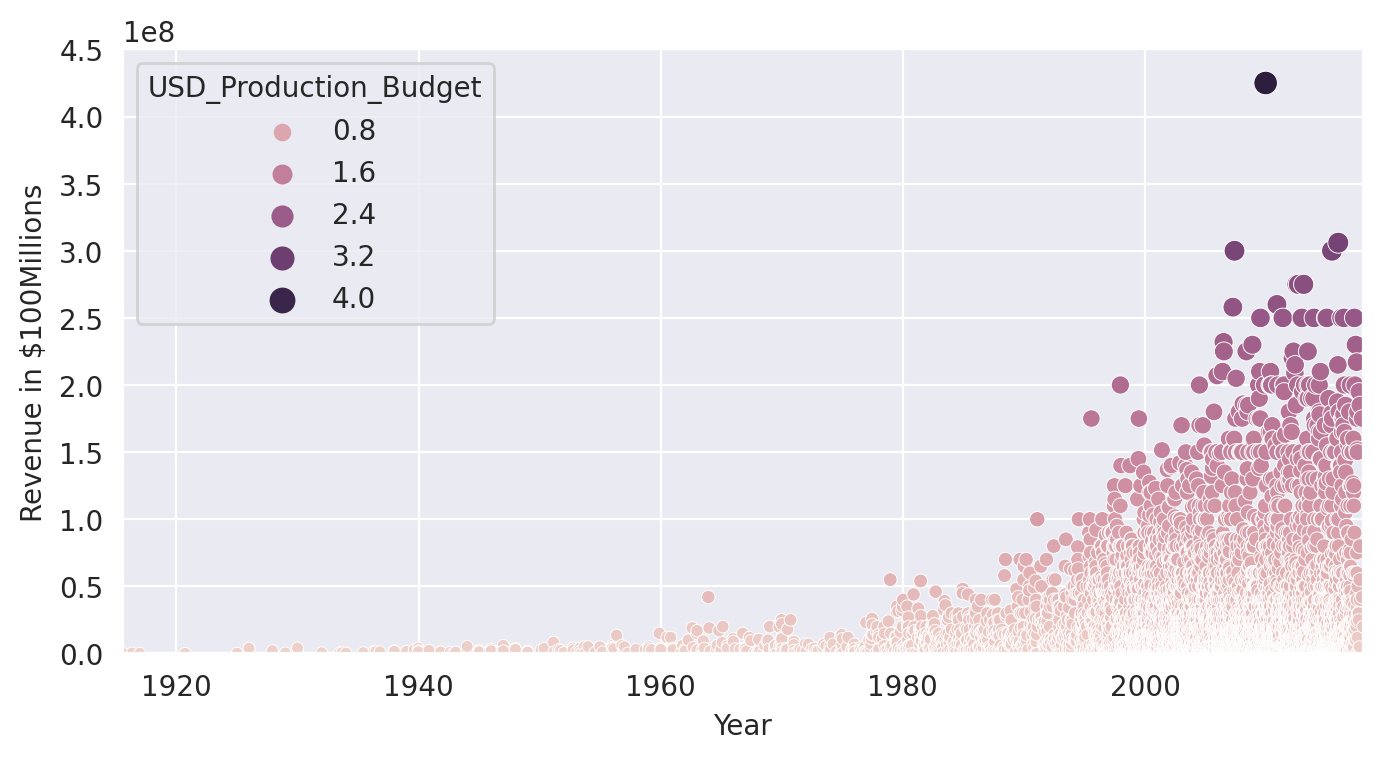

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='Release_Date',
                      y='USD_Production_Budget',
                      hue='USD_Production_Budget',
                      size='USD_Production_Budget')

  ax.set(ylim=(0, 450000000),
        xlim=(data_clean['Release_Date'].min(), data_clean['Release_Date'].max()),
        ylabel='Revenue in $100Millions',
        xlabel='Year')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
data_clean['Decade'] = data_clean['Release_Date'].dt.year.floordiv(10)*10

In [ ]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Total_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,21000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,33000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean['Decade'] < 1970]
len(old_films)

153

In [ ]:
new_films = data_clean[data_clean['Decade'] >= 1970]
len(new_films)

5231

# Seaborn Regression Plots

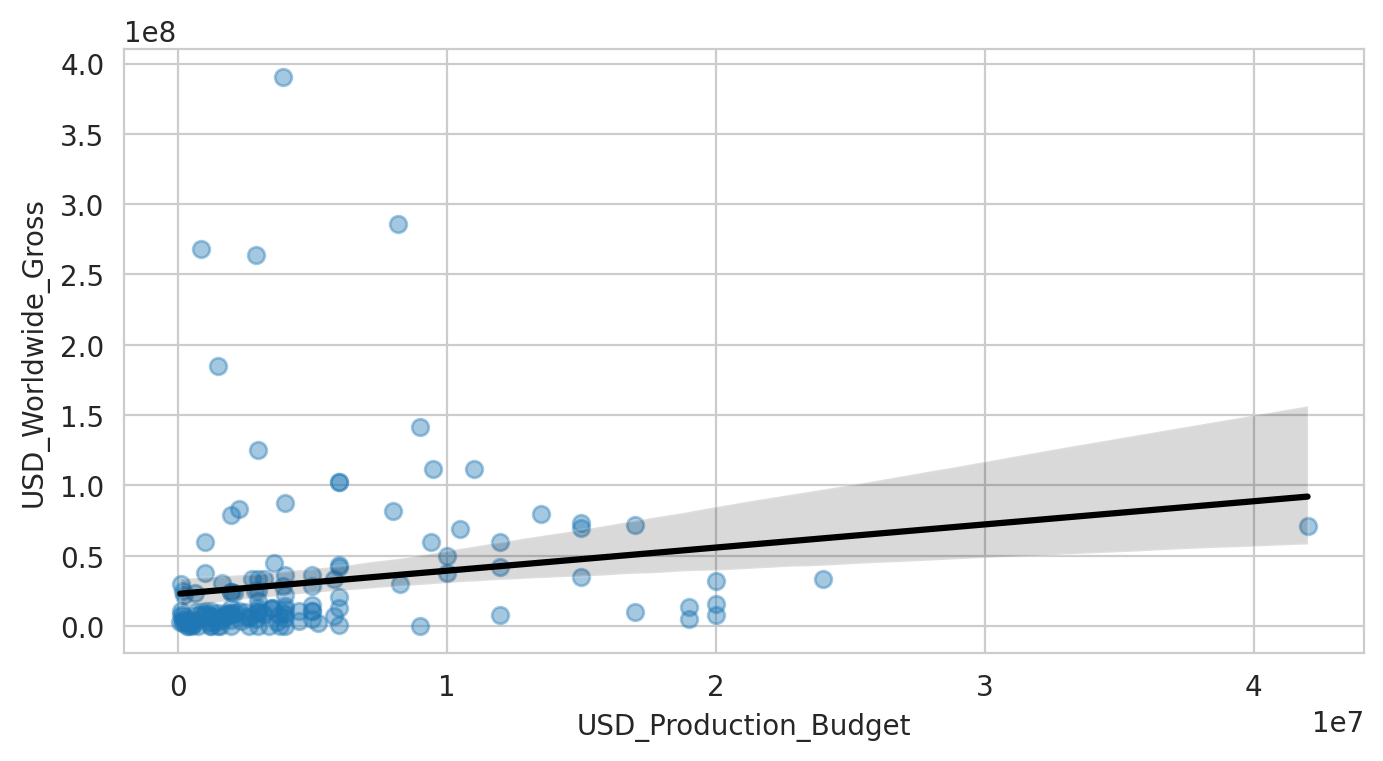

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4},
              line_kws={'color': 'black'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

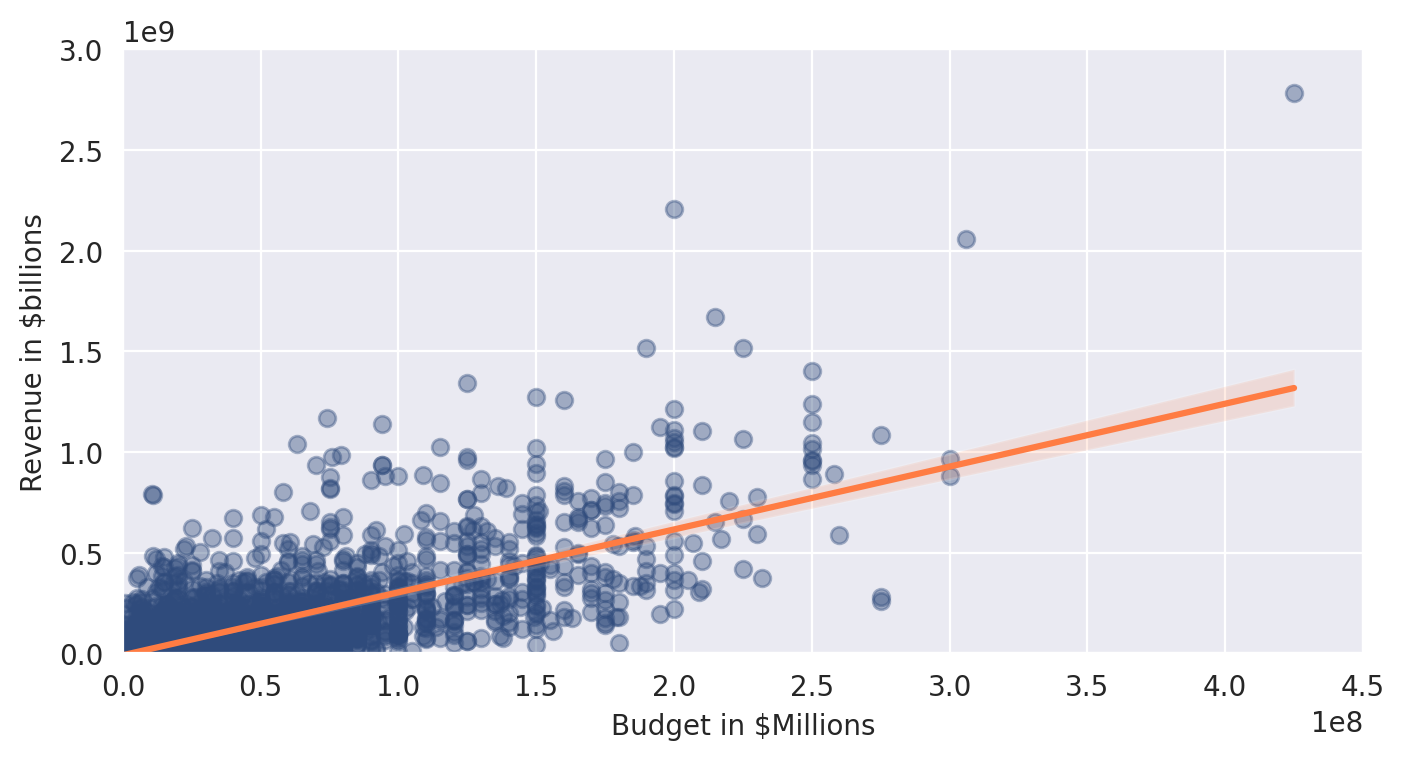

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              color='#2f4b7c',
              scatter_kws = {'alpha': 0.4},
              line_kws={'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $billions',
        xlabel='Budget in $Millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
regression = LinearRegression()

In [ ]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)

LinearRegression()

In [ ]:
regression.intercept_

array([22821538.63508039])

In [ ]:
regression.coef_

array([[1.64771314]])

In [ ]:
regression.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
    budget = 350000000
    revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
    revenue_estimate = round(revenue_estimate, -6)
    print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
